In [2]:
import numpy as np # for mathematical caluclations
import pandas as pd 
from datetime import datetime  # to access datetime
import scipy.stats as stats

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## Creating Data Frame for Analysis

In [2]:
# importing data
stats = pd.read_csv('nba_stats_cleaned.csv')
stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,29,108,0.269,167,296,0.564,0.521,87,124,0.702,100,228,328,50,31,30,59,102,508,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,0,1,0.000,157,262,0.599,0.597,47,129,0.364,214,271,485,97,36,46,79,98,361,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,688,240,88,61,187,208,1529,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,81,228,0.355,84,158,0.532,0.532,56,69,0.812,43,78,121,67,16,15,41,99,467,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,94,266,0.353,153,259,0.591,0.560,108,144,0.750,85,286,371,97,45,48,60,143,696,aldamsa01


In [3]:
# creating data just for centers
center = stats[stats['Pos']=='C']
center.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,98.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,261.777778,26.222222,49.342593,23.731481,1014.648148,184.268519,323.842593,0.560491,20.305556,58.000000,0.286429,163.962963,265.842593,0.603380,0.592139,83.611111,116.333333,0.691898,95.398148,213.027778,308.425926,76.462963,26.120370,43.129630,57.564815,110.000000,472.453704
std,162.236146,4.405462,22.352387,27.835165,757.680046,169.746959,300.434923,0.099036,33.792788,89.994081,0.194323,155.758375,254.689812,0.085346,0.084843,100.537605,125.268832,0.150064,76.243332,182.183253,249.990325,101.703842,22.061392,42.469801,53.708850,73.871826,448.971501
min,1.000000,19.000000,1.000000,0.000000,20.000000,2.000000,5.000000,0.250000,0.000000,0.000000,0.000000,1.000000,3.000000,0.250000,0.250000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,120.500000,23.000000,36.000000,1.000000,353.250000,55.000000,89.000000,0.500000,0.000000,2.750000,0.170750,46.750000,71.750000,0.571000,0.553500,19.750000,26.750000,0.626500,31.000000,72.250000,103.500000,15.000000,6.750000,11.750000,19.500000,43.750000,136.750000
50%,255.500000,25.000000,52.000000,8.500000,858.000000,126.000000,237.500000,0.551500,4.000000,13.500000,0.328500,121.000000,186.000000,0.614500,0.593500,44.000000,71.500000,0.703000,85.000000,168.000000,261.000000,48.500000,19.500000,30.000000,41.000000,100.000000,321.500000
75%,409.250000,29.000000,68.000000,48.250000,1675.000000,279.500000,487.250000,0.630500,21.500000,68.000000,0.381500,236.750000,386.500000,0.650000,0.642750,113.750000,161.250000,0.778250,133.500000,329.750000,474.500000,90.750000,43.250000,57.500000,82.000000,170.250000,696.750000
max,539.000000,42.000000,82.000000,82.000000,2746.000000,728.000000,1328.000000,0.819000,145.000000,364.000000,1.000000,662.000000,1128.000000,0.819000,0.819000,661.000000,771.000000,1.000000,274.000000,744.000000,973.000000,678.000000,88.000000,193.000000,247.000000,279.000000,2183.000000


In [4]:
# setting indexes
center = center.reset_index(drop=True)
center.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,29,108,0.269,167,296,0.564,0.521,87,124,0.702,100,228,328,50,31,30,59,102,508,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,0,1,0.000,157,262,0.599,0.597,47,129,0.364,214,271,485,97,36,46,79,98,361,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,688,240,88,61,187,208,1529,adebaba01
3,8,Jarrett Allen,C,24,CLE,68,68,2220,403,626,0.644,1,10,0.100,402,616,0.653,0.645,162,221,0.733,221,445,666,113,54,84,93,153,969,allenja01
4,17,Deandre Ayton,C,24,PHO,67,67,2035,522,887,0.589,7,24,0.292,515,863,0.597,0.592,152,200,0.760,172,495,667,115,37,53,120,190,1203,aytonde01


In [5]:
# dataframe for advanced player stats
advanced = pd.read_csv('NBA Advanced Cleaned Stats.csv')

In [6]:
# making advanced stat dataframe of only centers
ad_center=advanced[advanced['Pos']=='C']
ad_center = ad_center.reset_index()
ad_center.head()

,index,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,0.554,0.267,0.307,9.3,24.4,16.3,6.3,1.3,2.6,11.4,19.4,NaN,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1,achiupr01
1,1,2,Steven Adams,C,29,MEM,42,1133,17.5,0.564,0.004,0.490,20.1,25.3,22.7,11.2,1.5,3.7,19.8,14.6,NaN,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7,adamsst01
2,2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,NaN,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01
3,7,8,Jarrett Allen,C,24,CLE,68,2220,19.9,0.670,0.016,0.353,11.7,23.6,17.7,7.5,1.2,3.5,11.4,16.4,NaN,5.5,4.0,9.5,0.205,NaN,1.3,1.0,2.4,2.4,allenja01
4,16,17,Deandre Ayton,C,24,PHO,67,2035,19.9,0.617,0.027,0.225,9.2,27.5,18.1,9.2,0.9,2.3,11.0,22.9,NaN,3.3,3.0,6.2,0.147,NaN,0.9,0.0,0.9,1.5,aytonde01


## Splitting centers up by team standing

In [7]:
# defining which teams are the top half and bottom half of the league by total wins
top = ['MIL','BOS','PHI','DEN','MEM','CLE','SAC','NYK','PHO','BRK','MIA','LAC','GSW','LAL','MIN']
bot = ['NOP','ATL','TOR','CHI','OKC','DAL','UTA','IND','WAS','ORL','POR','CHO','HOU','SAS','DET']

In [8]:
# creating column to say which group a player belongs to
center['Standing']=0
for i in range(len(center)):
    if center.loc[i,'Tm'] in top:
        center.loc[i,'Standing']='Top'
    else:
        center.loc[i,'Standing']='Bottom'

In [9]:
center.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,98.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,261.777778,26.222222,49.342593,23.731481,1014.648148,184.268519,323.842593,0.560491,20.305556,58.000000,0.286429,163.962963,265.842593,0.603380,0.592139,83.611111,116.333333,0.691898,95.398148,213.027778,308.425926,76.462963,26.120370,43.129630,57.564815,110.000000,472.453704
std,162.236146,4.405462,22.352387,27.835165,757.680046,169.746959,300.434923,0.099036,33.792788,89.994081,0.194323,155.758375,254.689812,0.085346,0.084843,100.537605,125.268832,0.150064,76.243332,182.183253,249.990325,101.703842,22.061392,42.469801,53.708850,73.871826,448.971501
min,1.000000,19.000000,1.000000,0.000000,20.000000,2.000000,5.000000,0.250000,0.000000,0.000000,0.000000,1.000000,3.000000,0.250000,0.250000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,120.500000,23.000000,36.000000,1.000000,353.250000,55.000000,89.000000,0.500000,0.000000,2.750000,0.170750,46.750000,71.750000,0.571000,0.553500,19.750000,26.750000,0.626500,31.000000,72.250000,103.500000,15.000000,6.750000,11.750000,19.500000,43.750000,136.750000
50%,255.500000,25.000000,52.000000,8.500000,858.000000,126.000000,237.500000,0.551500,4.000000,13.500000,0.328500,121.000000,186.000000,0.614500,0.593500,44.000000,71.500000,0.703000,85.000000,168.000000,261.000000,48.500000,19.500000,30.000000,41.000000,100.000000,321.500000
75%,409.250000,29.000000,68.000000,48.250000,1675.000000,279.500000,487.250000,0.630500,21.500000,68.000000,0.381500,236.750000,386.500000,0.650000,0.642750,113.750000,161.250000,0.778250,133.500000,329.750000,474.500000,90.750000,43.250000,57.500000,82.000000,170.250000,696.750000
max,539.000000,42.000000,82.000000,82.000000,2746.000000,728.000000,1328.000000,0.819000,145.000000,364.000000,1.000000,662.000000,1128.000000,0.819000,0.819000,661.000000,771.000000,1.000000,274.000000,744.000000,973.000000,678.000000,88.000000,193.000000,247.000000,279.000000,2183.000000


In [10]:
# creating new data frame with only centers that play above a certain threshold of minutes
center2=center[((center['MP']>=1500)&(center['Standing']=='Bottom'))|
               ((center['MP']>=1700)&(center['Standing']=='Top'))]

In [11]:
center2['Standing'].value_counts()

Standing
Top       15
Bottom    15
Name: count, dtype: int64

In [12]:
# Creating standing column in advanced stat dataframe
ad_center['Standing']=0
for i in range(len(ad_center)):
    if ad_center.loc[i,'Tm'] in top:
        ad_center.loc[i,'Standing']='Top'
    else:
        ad_center.loc[i,'Standing']='Bottom'
ad_center.head()

,index,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Standing
0,0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,0.554,0.267,0.307,9.3,24.4,16.3,6.3,1.3,2.6,11.4,19.4,NaN,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1,achiupr01,Bottom
1,1,2,Steven Adams,C,29,MEM,42,1133,17.5,0.564,0.004,0.490,20.1,25.3,22.7,11.2,1.5,3.7,19.8,14.6,NaN,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7,adamsst01,Top
2,2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,NaN,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01,Top
3,7,8,Jarrett Allen,C,24,CLE,68,2220,19.9,0.670,0.016,0.353,11.7,23.6,17.7,7.5,1.2,3.5,11.4,16.4,NaN,5.5,4.0,9.5,0.205,NaN,1.3,1.0,2.4,2.4,allenja01,Top
4,16,17,Deandre Ayton,C,24,PHO,67,2035,19.9,0.617,0.027,0.225,9.2,27.5,18.1,9.2,0.9,2.3,11.0,22.9,NaN,3.3,3.0,6.2,0.147,NaN,0.9,0.0,0.9,1.5,aytonde01,Top


In [13]:
# Filtering out players 
ad_center2=ad_center[((ad_center['MP']>=1500)&(ad_center['Standing']=='Bottom'))|
               ((ad_center['MP']>=1700)&(ad_center['Standing']=='Top'))]

In [14]:
ad_center2['Standing'].value_counts()

Standing
Top       15
Bottom    15
Name: count, dtype: int64

## Significance Testing

In [15]:
import scipy.stats as stats

In [16]:
# t test for basic stats at alpha level of 0.05
included=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS']
result=[]
import scipy.stats as stats
for i in included:
    bfg=center2[center2['Standing']=='Bottom'][i]
    tfg=center2[center2['Standing']=='Top'][i]
    result.append(stats.ttest_ind(a=bfg, b=tfg,equal_var=True).pvalue)
alpha=0.05
decision=[]
for i in result:
    if i < alpha:
        decision.append('Reject')
    else:
        decision.append('Accept')
final=pd.DataFrame(data={'Metrics':included,'P-Value':result,'Decision':decision})
final[final['Decision']=='Reject'].sort_values(by='P-Value')

,Metrics,P-Value,Decision
6,2P,0.043241,Reject


In [17]:
# t test for advanced stats at alpha level of 0.05
included=['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
result=[]
import scipy.stats as stats
for i in included:
    bfg=ad_center2[ad_center2['Standing']=='Bottom'][i]
    tfg=ad_center2[ad_center2['Standing']=='Top'][i]
    result.append(stats.ttest_ind(a=bfg, b=tfg,equal_var=True).pvalue)
alpha=0.05
decision=[]
for i in result:
    if i < alpha:
        decision.append('Reject')
    else:
        decision.append('Accept')
final=pd.DataFrame(data={'Metrics':included,'P-Value':result,'Decision':decision})
final[final['Decision']=='Reject'].sort_values(by='P-Value')

,Metrics,P-Value,Decision
13,DWS,0.000052,Reject
14,WS,0.000405,Reject
17,DBPM,0.002217,Reject
15,WS/48,0.005564,Reject
12,OWS,0.009219,Reject
19,VORP,0.019704,Reject
18,BPM,0.033730,Reject


In [ ]:
fig = px.histogram(ad_center2, x='2P', color='Standing',
                   marginal="box", height=500, width=1000) # or violin, rug
fig.update_traces(opacity=0.3)
fig.update_layout(barmode='overlay',plot_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(dtick=0.5,ticks='outside',showline=True,linecolor='black',mirror=False)
fig.show()

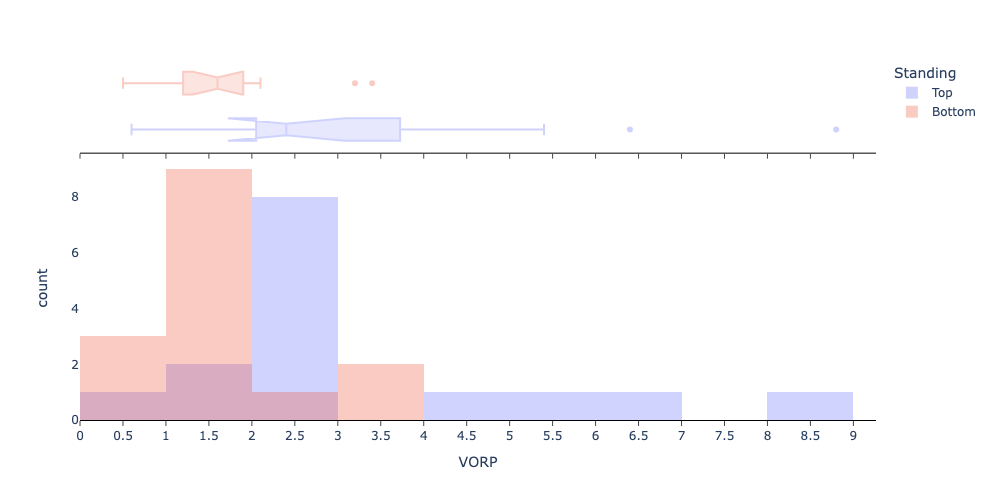

In [94]:
fig = px.histogram(ad_center2, x='VORP', color='Standing',
                   marginal="box", height=500, width=1000) # or violin, rug
fig.update_traces(opacity=0.3)
fig.update_layout(barmode='overlay',plot_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(dtick=0.5,ticks='outside',showline=True,linecolor='black',mirror=False)
fig.show()

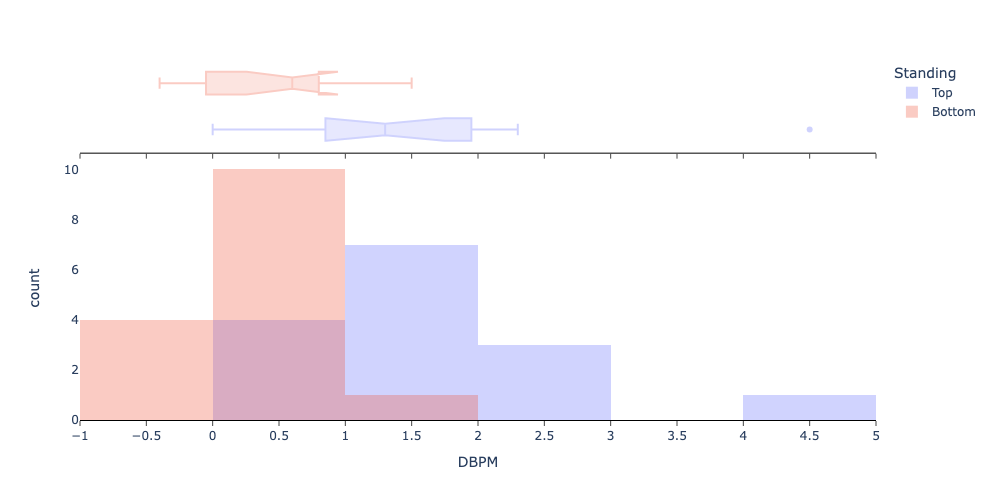

In [93]:
fig = px.histogram(ad_center2, x='DBPM', color='Standing',
                   marginal="box", height=500, width=1000) # or violin, rug
fig.update_traces(opacity=0.3)
fig.update_layout(barmode='overlay',plot_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(dtick=0.5,ticks='outside',showline=True,linecolor='black',mirror=False)
fig.show()

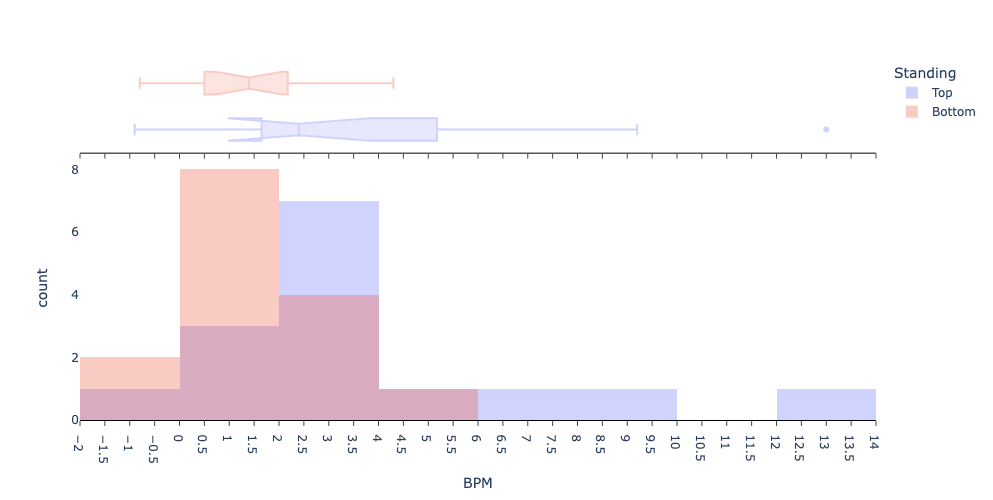

In [95]:
fig = px.histogram(ad_center2, x='BPM', color='Standing',
                   marginal="box", height=500, width=1000) # or violin, rug
fig.update_traces(opacity=0.3)
fig.update_layout(barmode='overlay',plot_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(dtick=0.5,ticks='outside',showline=True,linecolor='black',mirror=False)
fig.show()

Winning stats
- 2pt
- DBPM 
- VORP
- BPM

## Making Weighted Scores for Each Center Based on Stats of Interest

In [27]:
# making one big dataframe with regular and advanced stats
full_center = pd.merge(ad_center2, center2, on='Rk')
full_center.head()

,index,Rk,Player_x,Pos_x,Age_x,Tm_x,G_x,MP_x,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional_x,Standing_x,Player_y,Pos_y,Age_y,Tm_y,G_y,GS,MP_y,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional_y,Standing_y
0,2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,NaN,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01,Top,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,688,240,88,61,187,208,1529,adebaba01,Top
1,7,8,Jarrett Allen,C,24,CLE,68,2220,19.9,0.670,0.016,0.353,11.7,23.6,17.7,7.5,1.2,3.5,11.4,16.4,NaN,5.5,4.0,9.5,0.205,NaN,1.3,1.0,2.4,2.4,allenja01,Top,Jarrett Allen,C,24,CLE,68,68,2220,403,626,0.644,1,10,0.100,402,616,0.653,0.645,162,221,0.733,221,445,666,113,54,84,93,153,969,allenja01,Top
2,16,17,Deandre Ayton,C,24,PHO,67,2035,19.9,0.617,0.027,0.225,9.2,27.5,18.1,9.2,0.9,2.3,11.0,22.9,NaN,3.3,3.0,6.2,0.147,NaN,0.9,0.0,0.9,1.5,aytonde01,Top,Deandre Ayton,C,24,PHO,67,67,2035,522,887,0.589,7,24,0.292,515,863,0.597,0.592,152,200,0.760,172,495,667,115,37,53,120,190,1203,aytonde01,Top
3,83,81,Clint Capela,C,28,ATL,65,1730,22.1,0.656,0.002,0.244,16.1,29.4,22.7,4.7,1.2,3.9,8.3,15.7,NaN,4.9,2.4,7.2,0.201,NaN,2.3,-0.1,2.2,1.8,capelca01,Bottom,Clint Capela,C,28,ATL,65,63,1730,350,536,0.653,0,1,0.000,350,535,0.654,0.653,79,131,0.603,258,459,717,58,45,79,54,139,779,capelca01,Bottom
4,86,84,Wendell Carter Jr.,C,23,ORL,57,1690,17.3,0.621,0.367,0.318,8.0,25.3,16.6,12.0,0.9,1.9,13.2,20.5,NaN,2.6,2.0,4.6,0.130,NaN,0.9,0.1,1.0,1.3,cartewe01,Bottom,Wendell Carter Jr.,C,23,ORL,57,54,1690,322,613,0.525,80,225,0.356,242,388,0.624,0.591,144,195,0.738,120,377,497,132,30,33,106,159,868,cartewe01,Bottom


In [28]:
# Removing null or duplicate columns
full_center = full_center.drop(columns=['index','Unnamed: 19','Unnamed: 24','Player-additional_x','Player_y',
                                        'Pos_y','Age_y','Tm_y','G_y','MP_y','Player-additional_y'])
full_center.head()
                               

,Rk,Player_x,Pos_x,Age_x,Tm_x,G_x,MP_x,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Standing_x,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Standing_y
0,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,Top,75,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,688,240,88,61,187,208,1529,Top
1,8,Jarrett Allen,C,24,CLE,68,2220,19.9,0.670,0.016,0.353,11.7,23.6,17.7,7.5,1.2,3.5,11.4,16.4,5.5,4.0,9.5,0.205,1.3,1.0,2.4,2.4,Top,68,403,626,0.644,1,10,0.100,402,616,0.653,0.645,162,221,0.733,221,445,666,113,54,84,93,153,969,Top
2,17,Deandre Ayton,C,24,PHO,67,2035,19.9,0.617,0.027,0.225,9.2,27.5,18.1,9.2,0.9,2.3,11.0,22.9,3.3,3.0,6.2,0.147,0.9,0.0,0.9,1.5,Top,67,522,887,0.589,7,24,0.292,515,863,0.597,0.592,152,200,0.760,172,495,667,115,37,53,120,190,1203,Top
3,81,Clint Capela,C,28,ATL,65,1730,22.1,0.656,0.002,0.244,16.1,29.4,22.7,4.7,1.2,3.9,8.3,15.7,4.9,2.4,7.2,0.201,2.3,-0.1,2.2,1.8,Bottom,63,350,536,0.653,0,1,0.000,350,535,0.654,0.653,79,131,0.603,258,459,717,58,45,79,54,139,779,Bottom
4,84,Wendell Carter Jr.,C,23,ORL,57,1690,17.3,0.621,0.367,0.318,8.0,25.3,16.6,12.0,0.9,1.9,13.2,20.5,2.6,2.0,4.6,0.130,0.9,0.1,1.0,1.3,Bottom,54,322,613,0.525,80,225,0.356,242,388,0.624,0.591,144,195,0.738,120,377,497,132,30,33,106,159,868,Bottom


In [29]:
# Creating new columns for normalized scores for each significant stat
# Creating a column with the sum of all normalized stat lines
weights={'2P':0.25,'DBPM':0.25,'BPM':0.25,'VORP':0.25}

for stat in weights.keys():
    max_val = full_center[stat].max()
    full_center.loc[:, stat+'_norm']=full_center[stat]/max_val
    
full_center.loc[:,'Weighted_Score']=sum([full_center[stat+'_norm']*weight for stat, weight in weights.items()])

ranked_c=full_center.sort_values('Weighted_Score',ascending=False)

print(ranked_c[['Player_x','Weighted_Score']].head(30))

              Player_x  Weighted_Score
14        Nikola Jokić        0.972432
8          Joel Embiid        0.736519
23    Domantas Sabonis        0.571141
6        Anthony Davis        0.526742
5          Nic Claxton        0.420568
0          Bam Adebayo        0.365595
27      Nikola Vučević        0.361479
13   Jaren Jackson Jr.        0.346793
22  Kristaps Porziņģis        0.346789
1        Jarrett Allen        0.321704
17         Brook Lopez        0.312406
15      Walker Kessler        0.310922
20       Mason Plumlee        0.284608
21        Jakob Poeltl        0.281864
24      Alperen Şengün        0.262866
16        Kevon Looney        0.260815
12          Al Horford        0.260273
2        Deandre Ayton        0.254408
25        Myles Turner        0.249943
11         Rudy Gobert        0.228075
3         Clint Capela        0.220064
18      Onyeka Okongwu        0.214963
10      Daniel Gafford        0.195794
28      Christian Wood        0.171374
19        Kelly Olynyk   

## Choosing optimal players for new team based on weight and salary

In [30]:
# importing player salary and formatting columns
salary=pd.read_csv('Nba Player Salaries.csv')
salary=salary.rename(columns={'Player Name':'Player','2022/2023':'Salary'})
salary=salary.drop(columns=['Player Id','2023/2024','2024/2025','2024/2025.1'])
salary.head()

,Player,Salary
0,Stephen Curry,"$48,070,014.00"
1,John Wall,"$47,345,760.00"
2,Russell Westbrook,"$47,080,179.00"
3,LeBron James,"$44,474,988.00"
4,Kevin Durant,"$44,119,845.00"


In [32]:
ranked_c=ranked_c.rename(columns={'Player_x':'Player'})

In [43]:
# merging full data frame with centers ranked by weighted score with their salaries
ranked_c2=pd.merge(ranked_c,salary,on='Player',how='left')
ranked_c2.head(3)

,Rk,Player,Pos_x,Age_x,Tm_x,G_x,MP_x,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Standing_x,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Standing_y,2P_norm,DBPM_norm,BPM_norm,VORP_norm,Weighted_Score,Salary
0,249,Nikola Jokić,C,27,DEN,69,2323,31.5,0.701,0.146,0.406,8.5,31.3,20.2,46.6,1.8,1.8,17.0,27.2,11.2,3.8,14.9,0.308,8.5,4.5,13.0,8.8,Top,69,646,1022,0.632,57,149,0.383,589,873,0.675,0.660,341,415,0.822,167,650,817,678,87,47,247,174,1690,Top,0.889728,1.000000,1.000000,1.000000,0.972432,"$33,047,803.00"
1,143,Joel Embiid,C,28,PHI,66,2284,31.4,0.655,0.151,0.581,5.9,28.3,17.3,22.9,1.4,4.6,11.9,37.0,8.4,3.9,12.3,0.259,6.8,2.3,9.2,6.4,Top,66,728,1328,0.548,66,200,0.330,662,1128,0.587,0.573,661,771,0.857,113,557,670,274,66,112,226,205,2183,Top,1.000000,0.511111,0.707692,0.727273,0.736519,"$33,616,770.00"
2,428,Domantas Sabonis,C,26,SAC,79,2736,23.5,0.668,0.088,0.467,10.6,30.0,20.3,30.4,1.1,1.2,16.9,21.3,9.6,3.0,12.6,0.221,4.1,1.8,5.8,5.4,Top,79,577,938,0.615,31,83,0.373,546,855,0.639,0.632,325,438,0.742,251,722,973,573,65,39,230,279,1510,Top,0.824773,0.400000,0.446154,0.613636,0.571141,"$21,100,000.00"


In [44]:
ranked_c2=ranked_c2.rename(columns={'Pos_x':'Pos','Tm_x':'Tm'})

In [45]:
# Manually adding in missing salary
ranked_c2.loc[8,'Salary']='$33,833,400.00'

In [46]:
# Removing dollar signs in salary
for i in range(len(ranked_c2)):
    ranked_c2.loc[i,'Salary']=ranked_c2.loc[i,'Salary'].strip('$')

In [47]:
# Removing decimal and following zeroes from salary
for i in range(len(ranked_c2)):
    ranked_c2.loc[i,'Salary']=ranked_c2.loc[i,'Salary'][:-3]

In [48]:
# removing commas from salary
for i in range(len(ranked_c2)):
    ranked_c2.loc[i,'Salary']=ranked_c2.loc[i,'Salary'].replace(',','')

In [49]:
# making salary column integer
for i in range(len(ranked_c2)):
    ranked_c2.loc[i,'Salary']=int(ranked_c2.loc[i,'Salary'])

In [58]:
ranked_c2=ranked_c2.rename(columns={'Standing_x':'Standing'})

Text(0.32, 3000000, 'Avg. Weighted Score')

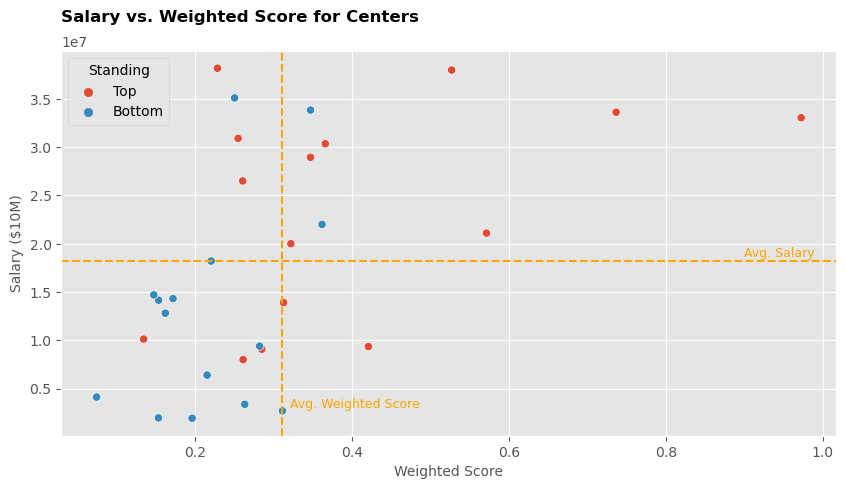

In [88]:
# Scatterplot depicting player salary vs weighted score
fig=sns.scatterplot(data = ranked_c2, 
                x = 'Weighted_Score', 
                y = 'Salary', 
                hue = 'Standing')

plt.title("Salary vs. Weighted Score for Centers", 
          loc= 'left',
          fontsize = 12,
          fontweight = 'bold',
          pad = 10)

plt.ylabel("Salary ($10M)", fontsize = 10)

plt.xlabel("Weighted Score", fontsize = 10)

avg_salary = ranked_c2['Salary'].mean()
avg_score = ranked_c2['Weighted_Score'].mean()

plt.axvline(x = avg_score, color = 'orange', linestyle = '--')
plt.axhline(y = avg_salary, color = 'orange', linestyle = '--')

plt.annotate("Avg. Salary", 
             (0.9,18700000), 
             color = "orange", 
             fontsize = 9)

plt.annotate("Avg. Weighted Score", 
             (0.32,3000000), 
             color = "orange", 
             fontsize = 9)

In [57]:
# exporting center ranking for optimization
ranked_c4=ranked_c2[['Player','Tm','Pos','Weighted_Score','Salary']]
ranked_c4.head()
ranked_c4.to_csv('centers_final_list.csv')

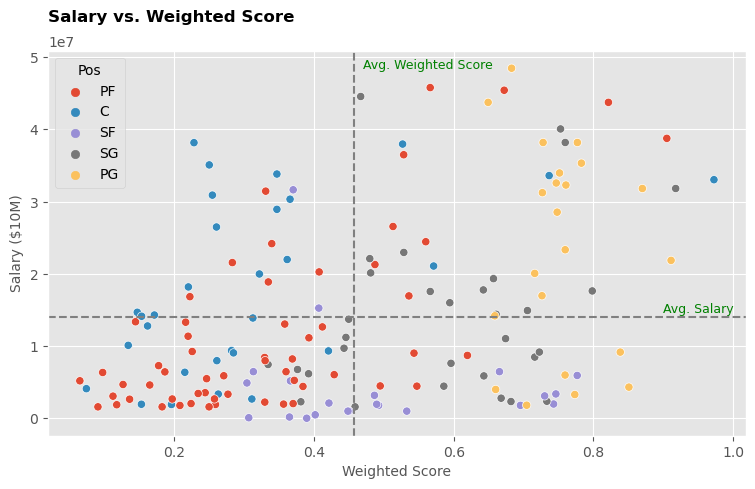

In [13]:
# Scatterplot depicting player salary vs weighted score
full=pd.read_csv('full.csv')
fig=sns.scatterplot(data = full, 
                x = 'Weighted_Score', 
                y = 'Salary', 
                hue = 'Pos')

plt.title("Salary vs. Weighted Score", 
          loc= 'left',
          fontsize = 12,
          fontweight = 'bold',
          pad = 10)

plt.ylabel("Salary ($10M)", fontsize = 10)

plt.xlabel("Weighted Score", fontsize = 10)

avg_salary = full['Salary'].mean()
avg_score = full['Weighted_Score'].mean()

plt.axvline(x = avg_score, color = 'grey', linestyle = '--')
plt.axhline(y = avg_salary, color = 'grey', linestyle = '--')

plt.annotate("Avg. Salary", 
             (0.9,14700000), 
             color = "green", 
             fontsize = 9)

plt.annotate("Avg. Weighted Score", 
             (0.47,48400000), 
             color = "green", 
             fontsize = 9)
            
plt.rcParams["figure.figsize"] = (9,5)